In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object
df = pd.read_csv("penguins.csv")

In [44]:
df.iloc[:276]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female


In [57]:
# Store the desired species values in the numpy array y
y = df.iloc[0:276].species.values
# Convert each entry of y with setosa to -1 and otherwise 1
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "flipper_length_mm"]].iloc[:276].values

C:\Users\alina\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


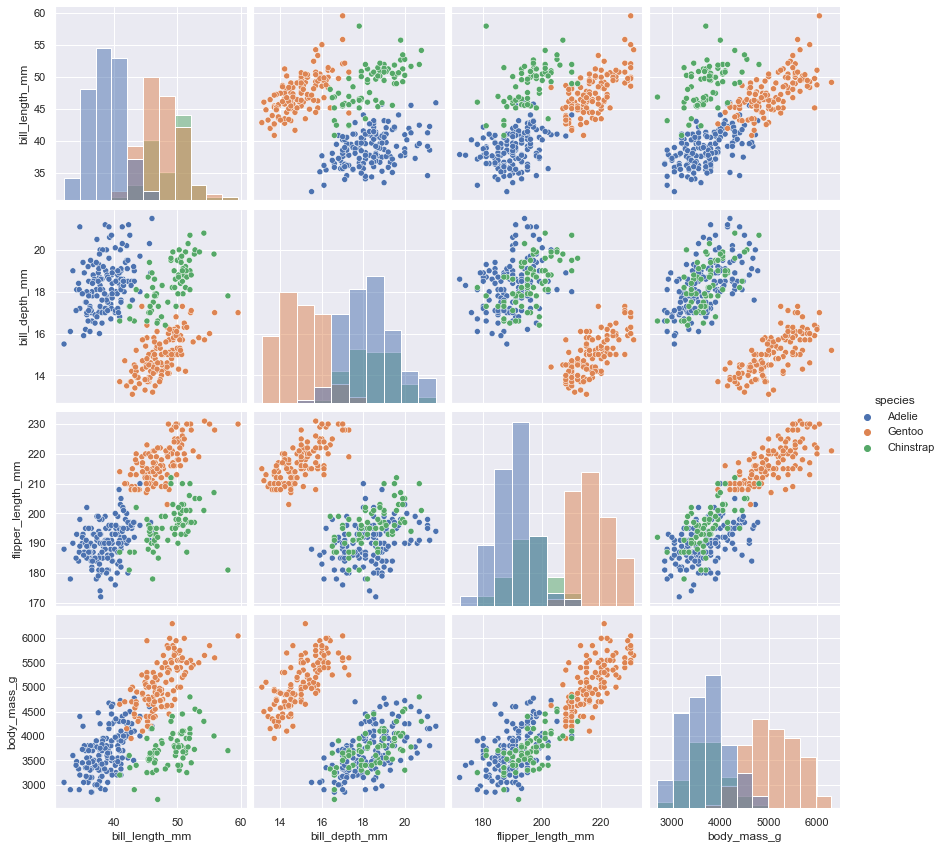

In [56]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

In [58]:
X

array([[ 39.1, 181. ],
       [ 39.5, 186. ],
       [ 40.3, 195. ],
       [  nan,   nan],
       [ 36.7, 193. ],
       [ 39.3, 190. ],
       [ 38.9, 181. ],
       [ 39.2, 195. ],
       [ 34.1, 193. ],
       [ 42. , 190. ],
       [ 37.8, 186. ],
       [ 37.8, 180. ],
       [ 41.1, 182. ],
       [ 38.6, 191. ],
       [ 34.6, 198. ],
       [ 36.6, 185. ],
       [ 38.7, 195. ],
       [ 42.5, 197. ],
       [ 34.4, 184. ],
       [ 46. , 194. ],
       [ 37.8, 174. ],
       [ 37.7, 180. ],
       [ 35.9, 189. ],
       [ 38.2, 185. ],
       [ 38.8, 180. ],
       [ 35.3, 187. ],
       [ 40.6, 183. ],
       [ 40.5, 187. ],
       [ 37.9, 172. ],
       [ 40.5, 180. ],
       [ 39.5, 178. ],
       [ 37.2, 178. ],
       [ 39.5, 188. ],
       [ 40.9, 184. ],
       [ 36.4, 195. ],
       [ 39.2, 196. ],
       [ 38.8, 190. ],
       [ 42.2, 180. ],
       [ 37.6, 181. ],
       [ 39.8, 184. ],
       [ 36.5, 182. ],
       [ 40.8, 195. ],
       [ 36. , 186. ],
       [ 44

In [55]:
# Create visualisation of data
plt.figure (figsize=(10,8))
plt.scatter (df[:,3], df[:,4])
plt.xlabel ('x0')
plt.ylabel ('x1')
plt.show ()

InvalidIndexError: (slice(None, None, None), 3)

<Figure size 720x576 with 0 Axes>

In [46]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state =42)

In [60]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [61]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

In [62]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

ValueError: Filled contours require at least 2 levels.

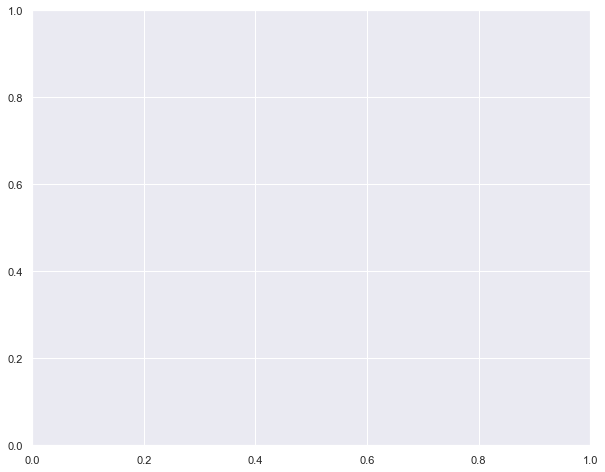

In [63]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron", fontsize = 5)
plt.xlabel("bill length [mm]", fontsize = 5)
plt.ylabel("flipper length [mm]", fontsize = 5)
plt.show()

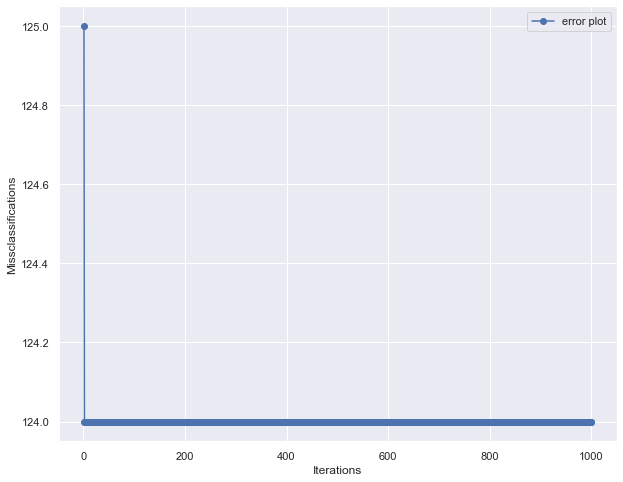

In [64]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

In [ ]:
# import metrics from sklearn
from sklearn import metrics
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix (y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_ppn = pd.DataFrame (confusion_matrix)
plt.figure (figsize =(8,6))

ax= plt.axes ()
sns.set (font_scale =1.3)
sns.heatmap(matrix_ppn, 
            annot =True,
           fmt = 'g',
           ax = ax,
          cmap=plt.cm.Blues)

ax.set_title ('Confusion Matrix - ppn')
ax.set_xlabel (' Predicted Label', fontsize =10)
#ax.set_xticklabels ()
ax.set_ylabel ('True Label', fontsize =10)
#ax.set_yticklabels (labels)
plt.show ()